# 보스톤 주택가격 - 다중 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(
    boston.data, columns=boston.feature_names
)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 산점도와 선형회귀 직선

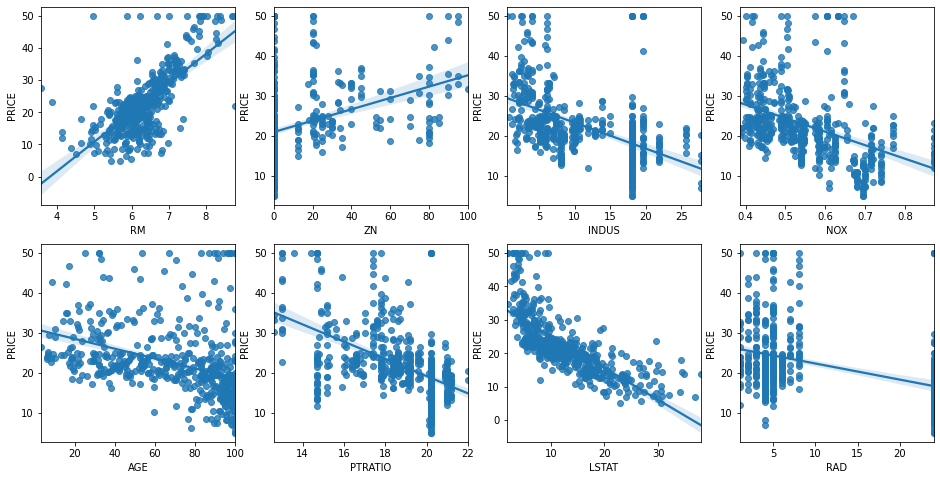

In [7]:
fig, asx = plt.subplots(figsize=(16,8), nrows=2, ncols=4)
features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(features):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=asx[row][col])

### 다중 선형회귀

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
# X = boston.data, y = boston.target
lr.fit(boston.data, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
weight = lr.coef_
weight

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [11]:
bias = lr.intercept_
bias

36.459488385090125

### 예측값

In [12]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [14]:
np.dot(weight, boston.data[0]) + bias

30.003843377016743

In [15]:
for i in range(5):
    X, y = boston.data[i], boston.target[i]
    pred = np.dot(weight, X) + bias
    print(f'실제값: {y:.4f}, 예측값: {pred:.4f}')

실제값: 24.0000, 예측값: 30.0038
실제값: 21.6000, 예측값: 25.0256
실제값: 34.7000, 예측값: 30.5676
실제값: 33.4000, 예측값: 28.6070
실제값: 36.2000, 예측값: 27.9435
